In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as Wrapper
from mpl_toolkits.mplot3d import Axes3D
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(train_df.isnull().sum())
print('')
print(test_df.isnull().sum())
print('')
print(train_df.describe())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   

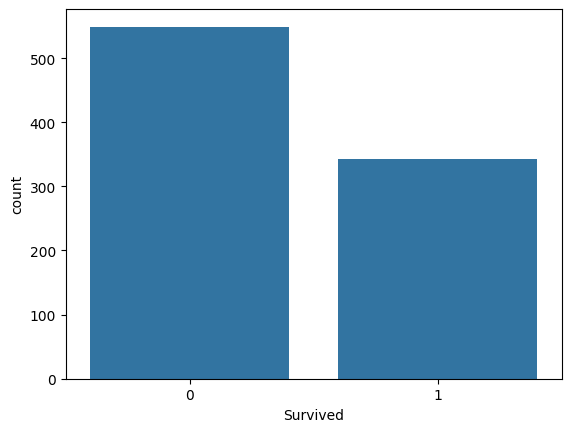

In [ ]:
sns.countplot(x='Survived', data=train_df)
plt.show()

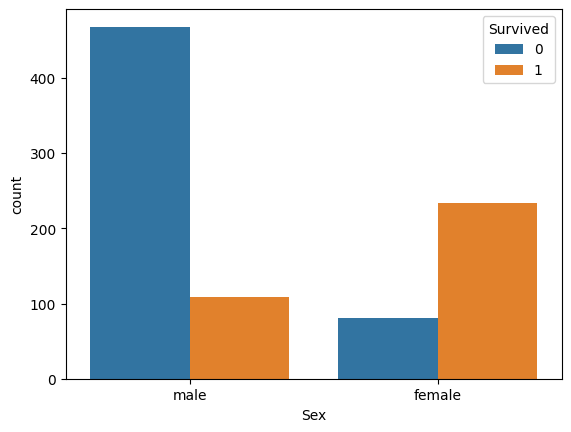

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.show()

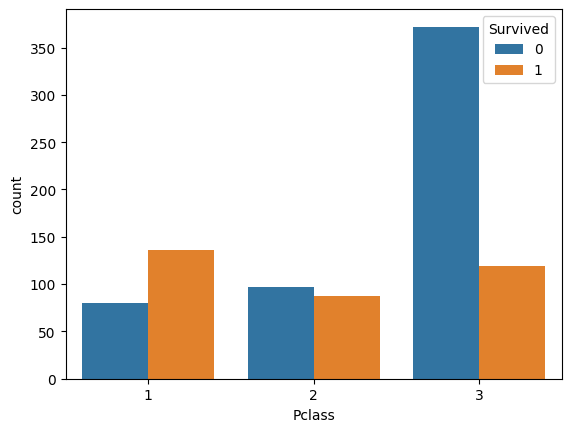

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.show()

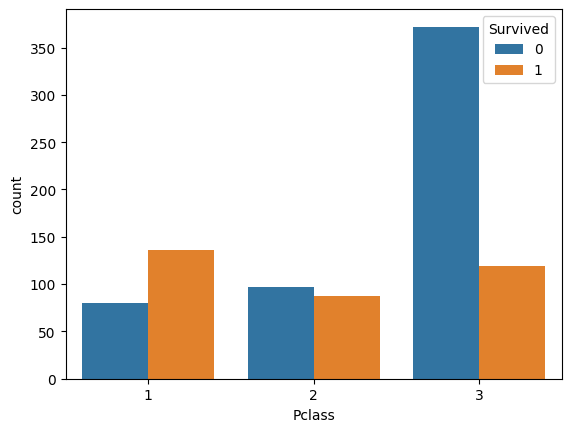

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.show()

In [ ]:
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
train_df.loc[:, 'Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [ ]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

In [ ]:
train_df['Has_Cabin'] = train_df['Cabin'].notnull().astype(int)
test_df['Has_Cabin'] = test_df['Cabin'].notnull().astype(int)

In [ ]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Emb')
test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix='Emb')

In [ ]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [ ]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']
X_train = train_df[features]
y_train = train_df['Survived']
X_test = test_df[features]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train.loc[:, ['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_test.loc[:, ['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
scores = cross_val_score(model, X_train, y_train, cv=11)
print(f"Acurácia média (validação cruzada): {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

Acurácia média (validação cruzada): 0.841 (+/- 0.083)


In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Melhores parâmetros: {grid_search.best_params_}")
model = grid_search.best_estimator_

Melhores parâmetros: {'max_depth': 7, 'n_estimators': 200}


In [ ]:
predictions = model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})
submission.to_csv('submission.csv', index=False)
print("Arquivo de submissão criado: submission.csv")

Arquivo de submissão criado: submission.csv


In [ ]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)

resultado_modelo = pd.DataFrame({
    "PassengerId" : test_df["PassengerId"],
    "Survived" : predictions
})

resultado_correto = pd.read_csv("gender_submission.csv")
accuracy = accuracy_score(resultado_modelo["Survived"],resultado_correto["Survived"])
print(f"Acurácia: {accuracy:.3f}")

Acurácia: 0.890
